In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from scipy.stats import gaussian_kde
from statsmodels.tsa.seasonal import seasonal_decompose
#import plotly.express as px
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df=pd.read_csv('C:\\Users\\Pooja\\Downloads\\Quote-Equity-INFY-EQ-03-02-2020-to-03-02-2021.csv')

In [4]:
pd.set_option('display.max_rows',1000)

In [5]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,03-Feb-20,EQ,782.00,790.95,764.50,779.50,767.10,767.40,771.38,847.00,615.10,6416745.0,4.949738e+09,132708.0,NaN,NaN,NaN,NaN,NaN,NaN
1,04-Feb-20,EQ,770.10,789.90,770.10,767.40,788.10,787.85,781.11,847.00,615.10,5771311.0,4.508020e+09,126688.0,NaN,NaN,NaN,NaN,NaN,NaN
2,05-Feb-20,EQ,781.00,786.00,774.40,787.85,784.50,784.55,779.33,847.00,615.10,6310409.0,4.917873e+09,142904.0,NaN,NaN,NaN,NaN,NaN,NaN
3,06-Feb-20,EQ,784.35,786.80,770.00,784.55,772.00,771.35,775.78,847.00,615.10,7341622.0,5.695513e+09,133662.0,NaN,NaN,NaN,NaN,NaN,NaN
4,07-Feb-20,EQ,775.95,778.85,771.00,771.35,776.00,777.30,775.80,847.00,615.10,2853344.0,2.213621e+09,53815.0,NaN,NaN,NaN,NaN,NaN,NaN
5,10-Feb-20,EQ,774.00,778.00,769.75,777.30,773.00,773.20,772.86,847.00,615.10,3827682.0,2.958264e+09,50917.0,NaN,NaN,NaN,NaN,NaN,NaN
6,11-Feb-20,EQ,779.00,779.10,769.20,773.20,775.00,773.55,773.48,847.00,615.10,4312817.0,3.335859e+09,83764.0,NaN,NaN,NaN,NaN,NaN,NaN
7,12-Feb-20,EQ,775.80,783.25,775.10,773.55,780.80,781.05,780.73,847.00,615.10,2948825.0,2.302229e+09,80507.0,NaN,NaN,NaN,NaN,NaN,NaN
8,13-Feb-20,EQ,785.00,794.00,782.20,781.05,792.50,792.25,787.51,847.00,615.10,4387430.0,3.455130e+09,80876.0,NaN,NaN,NaN,NaN,NaN,NaN
9,14-Feb-20,EQ,794.50,799.20,784.60,792.25,786.30,786.45,791.78,847.00,615.10,5321680.0,4.213574e+09,103460.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isna().sum()

Date               2
series             2
OPEN               2
HIGH               2
LOW                2
PREV. CLOSE        2
ltp                2
close              2
vwap               2
52W H              2
52W L              2
VOLUME             2
VALUE              2
No of trades       2
Unnamed: 14      253
Unnamed: 15      253
Unnamed: 16      253
Unnamed: 17      253
Unnamed: 18      253
Unnamed: 19      253
dtype: int64

In [7]:
df.dtypes

Date              object
series            object
OPEN             float64
HIGH             float64
LOW              float64
PREV. CLOSE      float64
ltp              float64
close            float64
vwap             float64
52W H            float64
52W L            float64
VOLUME           float64
VALUE            float64
No of trades     float64
Unnamed: 14      float64
Unnamed: 15      float64
Unnamed: 16      float64
Unnamed: 17      float64
Unnamed: 18      float64
Unnamed: 19      float64
dtype: object

In [8]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,03-Feb-20,EQ,782.00,790.95,764.50,779.50,767.10,767.40,771.38,847.00,615.10,6416745.0,4.949738e+09,132708.0,NaN,NaN,NaN,NaN,NaN,NaN
1,04-Feb-20,EQ,770.10,789.90,770.10,767.40,788.10,787.85,781.11,847.00,615.10,5771311.0,4.508020e+09,126688.0,NaN,NaN,NaN,NaN,NaN,NaN
2,05-Feb-20,EQ,781.00,786.00,774.40,787.85,784.50,784.55,779.33,847.00,615.10,6310409.0,4.917873e+09,142904.0,NaN,NaN,NaN,NaN,NaN,NaN
3,06-Feb-20,EQ,784.35,786.80,770.00,784.55,772.00,771.35,775.78,847.00,615.10,7341622.0,5.695513e+09,133662.0,NaN,NaN,NaN,NaN,NaN,NaN
4,07-Feb-20,EQ,775.95,778.85,771.00,771.35,776.00,777.30,775.80,847.00,615.10,2853344.0,2.213621e+09,53815.0,NaN,NaN,NaN,NaN,NaN,NaN
5,10-Feb-20,EQ,774.00,778.00,769.75,777.30,773.00,773.20,772.86,847.00,615.10,3827682.0,2.958264e+09,50917.0,NaN,NaN,NaN,NaN,NaN,NaN
6,11-Feb-20,EQ,779.00,779.10,769.20,773.20,775.00,773.55,773.48,847.00,615.10,4312817.0,3.335859e+09,83764.0,NaN,NaN,NaN,NaN,NaN,NaN
7,12-Feb-20,EQ,775.80,783.25,775.10,773.55,780.80,781.05,780.73,847.00,615.10,2948825.0,2.302229e+09,80507.0,NaN,NaN,NaN,NaN,NaN,NaN
8,13-Feb-20,EQ,785.00,794.00,782.20,781.05,792.50,792.25,787.51,847.00,615.10,4387430.0,3.455130e+09,80876.0,NaN,NaN,NaN,NaN,NaN,NaN
9,14-Feb-20,EQ,794.50,799.20,784.60,792.25,786.30,786.45,791.78,847.00,615.10,5321680.0,4.213574e+09,103460.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isna().sum()

Date               2
series             2
OPEN               2
HIGH               2
LOW                2
PREV. CLOSE        2
ltp                2
close              2
vwap               2
52W H              2
52W L              2
VOLUME             2
VALUE              2
No of trades       2
Unnamed: 14      253
Unnamed: 15      253
Unnamed: 16      253
Unnamed: 17      253
Unnamed: 18      253
Unnamed: 19      253
dtype: int64

In [10]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,03-Feb-20,EQ,782.00,790.95,764.50,779.50,767.10,767.40,771.38,847.00,615.10,6416745.0,4.949738e+09,132708.0,NaN,NaN,NaN,NaN,NaN,NaN
1,04-Feb-20,EQ,770.10,789.90,770.10,767.40,788.10,787.85,781.11,847.00,615.10,5771311.0,4.508020e+09,126688.0,NaN,NaN,NaN,NaN,NaN,NaN
2,05-Feb-20,EQ,781.00,786.00,774.40,787.85,784.50,784.55,779.33,847.00,615.10,6310409.0,4.917873e+09,142904.0,NaN,NaN,NaN,NaN,NaN,NaN
3,06-Feb-20,EQ,784.35,786.80,770.00,784.55,772.00,771.35,775.78,847.00,615.10,7341622.0,5.695513e+09,133662.0,NaN,NaN,NaN,NaN,NaN,NaN
4,07-Feb-20,EQ,775.95,778.85,771.00,771.35,776.00,777.30,775.80,847.00,615.10,2853344.0,2.213621e+09,53815.0,NaN,NaN,NaN,NaN,NaN,NaN
5,10-Feb-20,EQ,774.00,778.00,769.75,777.30,773.00,773.20,772.86,847.00,615.10,3827682.0,2.958264e+09,50917.0,NaN,NaN,NaN,NaN,NaN,NaN
6,11-Feb-20,EQ,779.00,779.10,769.20,773.20,775.00,773.55,773.48,847.00,615.10,4312817.0,3.335859e+09,83764.0,NaN,NaN,NaN,NaN,NaN,NaN
7,12-Feb-20,EQ,775.80,783.25,775.10,773.55,780.80,781.05,780.73,847.00,615.10,2948825.0,2.302229e+09,80507.0,NaN,NaN,NaN,NaN,NaN,NaN
8,13-Feb-20,EQ,785.00,794.00,782.20,781.05,792.50,792.25,787.51,847.00,615.10,4387430.0,3.455130e+09,80876.0,NaN,NaN,NaN,NaN,NaN,NaN
9,14-Feb-20,EQ,794.50,799.20,784.60,792.25,786.30,786.45,791.78,847.00,615.10,5321680.0,4.213574e+09,103460.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(253, 20)

In [13]:
df=df.iloc[:,:13]

In [14]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE '],
      dtype='object')

In [15]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE
0,03-Feb-20,EQ,782.00,790.95,764.50,779.50,767.10,767.40,771.38,847.00,615.10,6416745.0,4.949738e+09
1,04-Feb-20,EQ,770.10,789.90,770.10,767.40,788.10,787.85,781.11,847.00,615.10,5771311.0,4.508020e+09
2,05-Feb-20,EQ,781.00,786.00,774.40,787.85,784.50,784.55,779.33,847.00,615.10,6310409.0,4.917873e+09
3,06-Feb-20,EQ,784.35,786.80,770.00,784.55,772.00,771.35,775.78,847.00,615.10,7341622.0,5.695513e+09
4,07-Feb-20,EQ,775.95,778.85,771.00,771.35,776.00,777.30,775.80,847.00,615.10,2853344.0,2.213621e+09
5,10-Feb-20,EQ,774.00,778.00,769.75,777.30,773.00,773.20,772.86,847.00,615.10,3827682.0,2.958264e+09
6,11-Feb-20,EQ,779.00,779.10,769.20,773.20,775.00,773.55,773.48,847.00,615.10,4312817.0,3.335859e+09
7,12-Feb-20,EQ,775.80,783.25,775.10,773.55,780.80,781.05,780.73,847.00,615.10,2948825.0,2.302229e+09
8,13-Feb-20,EQ,785.00,794.00,782.20,781.05,792.50,792.25,787.51,847.00,615.10,4387430.0,3.455130e+09
9,14-Feb-20,EQ,794.50,799.20,784.60,792.25,786.30,786.45,791.78,847.00,615.10,5321680.0,4.213574e+09


In [16]:
df.shape

(253, 13)

In [17]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE '],
      dtype='object')

In [18]:
df['Date ']=pd.to_datetime(df['Date '])

In [19]:
df=df.rename(columns={'Date ':'Date'})

In [20]:
df.columns

Index(['Date', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE '],
      dtype='object')

In [21]:
Data=pd.DataFrame({'OPEN':df['OPEN ']})

In [22]:
Data.index=df.Date

In [24]:
Data.columns

Index(['OPEN'], dtype='object')

In [25]:
Data.columns

Index(['OPEN'], dtype='object')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 6)})

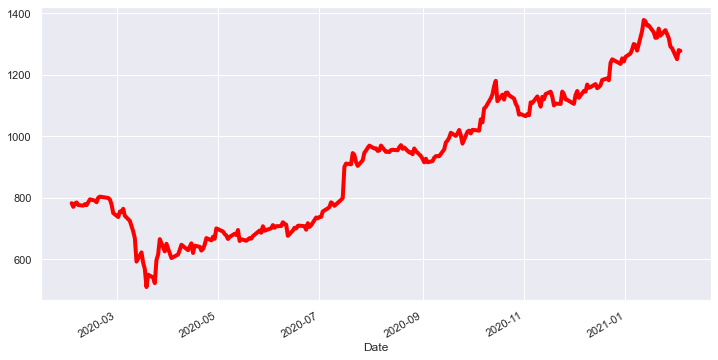

In [27]:
Data['OPEN'].plot(linewidth=4.0, color = 'red')

In [28]:
Data['fnaive'] = Data.shift(1)

In [29]:
Data

,OPEN,fnaive
Date,,
2020-02-03,782.00,NaN
2020-02-04,770.10,782.00
2020-02-05,781.00,770.10
2020-02-06,784.35,781.00
2020-02-07,775.95,784.35
2020-02-10,774.00,775.95
2020-02-11,779.00,774.00
2020-02-12,775.80,779.00
2020-02-13,785.00,775.80


In [30]:
Data.isnull().sum()

OPEN      2
fnaive    2
dtype: int64

In [31]:
Data=Data.iloc[:-2,:]

In [32]:
Data

,OPEN,fnaive
Date,,
2020-02-03,782.00,NaN
2020-02-04,770.10,782.00
2020-02-05,781.00,770.10
2020-02-06,784.35,781.00
2020-02-07,775.95,784.35
2020-02-10,774.00,775.95
2020-02-11,779.00,774.00
2020-02-12,775.80,779.00
2020-02-13,785.00,775.80


In [33]:
Data.shape

(251, 2)

In [34]:
def eval_metric(x,y):
    residual = (x-y)
    bias  = residual.mean()
    abias  = abs(residual).mean()
    abias_value  = abs(residual)
    ape = abias_value/x
    map = ape.mean()*100
    biass  = (residual)**2
    msr = biass.mean()
    biass  = (residual)**2
    rmsr = np.sqrt(biass.mean())
    eva_metric = pd.DataFrame({'Bias':[bias],
                               'MAE':[abias],'MAPE':[map],'MSE':[msr],
                               'RMSE':[rmsr]}, index = ['Naive Forecast'])
    return eva_metric

In [35]:
eval_metric(Data['OPEN'], Data['fnaive'])

,Bias,MAE,MAPE,MSE,RMSE
Naive Forecast,1.9826,14.8154,1.734831,417.40085,20.43039


In [36]:
#Moving Average
for i in range(0,Data.shape[0]-1):
    Data.loc[Data.index[i+1],'MA_2'] = np.round(((Data.iloc[i,1]+ Data.iloc[i+1,1]) /2),2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:850: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(new_indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [37]:
for i in range(0,Data.shape[0]-2):
    Data.loc[Data.index[i+2],'MA_3'] = np.round(((Data.iloc[i,1]+ Data.iloc[i+1,1] +Data.iloc[i+2,1])/3),2)

<ipython-input-37-e935aed1ab5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.loc[Data.index[i+2],'MA_3'] = np.round(((Data.iloc[i,1]+ Data.iloc[i+1,1] +Data.iloc[i+2,1])/3),2)


In [38]:
for i in range(0,Data.shape[0]-3):
    Data.loc[Data.index[i+3],'MA_4'] = np.round(((Data.iloc[i,1]+ Data.iloc[i+1,1] +Data.iloc[i+2,1]+Data.iloc[i+3,1])/4),2)

<ipython-input-38-15859ebaa11f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.loc[Data.index[i+3],'MA_4'] = np.round(((Data.iloc[i,1]+ Data.iloc[i+1,1] +Data.iloc[i+2,1]+Data.iloc[i+3,1])/4),2)


In [39]:
Data

,OPEN,fnaive,MA_2,MA_3,MA_4
Date,,,,,
2020-02-03,782.00,NaN,NaN,NaN,NaN
2020-02-04,770.10,782.00,NaN,NaN,NaN
2020-02-05,781.00,770.10,776.05,NaN,NaN
2020-02-06,784.35,781.00,775.55,777.70,NaN
2020-02-07,775.95,784.35,782.68,778.48,779.36
2020-02-10,774.00,775.95,780.15,780.43,777.85
2020-02-11,779.00,774.00,774.98,778.10,778.82
2020-02-12,775.80,779.00,776.50,776.32,778.32
2020-02-13,785.00,775.80,777.40,776.27,776.19


In [40]:
Data

,OPEN,fnaive,MA_2,MA_3,MA_4
Date,,,,,
2020-02-03,782.00,NaN,NaN,NaN,NaN
2020-02-04,770.10,782.00,NaN,NaN,NaN
2020-02-05,781.00,770.10,776.05,NaN,NaN
2020-02-06,784.35,781.00,775.55,777.70,NaN
2020-02-07,775.95,784.35,782.68,778.48,779.36
2020-02-10,774.00,775.95,780.15,780.43,777.85
2020-02-11,779.00,774.00,774.98,778.10,778.82
2020-02-12,775.80,779.00,776.50,776.32,778.32
2020-02-13,785.00,775.80,777.40,776.27,776.19


In [41]:
def eval_metric_ma(x,ma_2,ma_3,ma_4):
    residual_1 = (x-ma_2)
    bias_1  = residual_1.mean()
    abias_1  = abs(residual_1).mean()
    abias_value_1  = abs(residual_1)
    ape_1 = abias_value_1/x
    map_1 = ape_1.mean()*100
    biass_1  = (residual_1)**2
    msr_1 = biass_1.mean()
    biass_1  = (residual_1)**2
    rmsr_1 = np.sqrt(biass_1.mean())
    # MA_3
    residual_2 = (x-ma_3)
    bias_2  = residual_2.mean()
    abias_2  = abs(residual_2).mean()
    abias_value_2  = abs(residual_2)
    ape_2 = abias_value_2/x
    map_2 = ape_2.mean()*100
    biass_2  = (residual_2)**2
    msr_2 = biass_2.mean()
    biass_2  = (residual_2)**2
    rmsr_2 = np.sqrt(biass_2.mean())
    #MA_4
    residual_3 = (x-ma_4)
    bias_3  = residual_3.mean()
    abias_3  = abs(residual_3).mean()
    abias_value_3  = abs(residual_3)
    ape_3 = abias_value_3/x
    map_3 = ape_3.mean()*100
    biass_3  = (residual_3)**2
    msr_3 = biass_3.mean()
    biass_3  = (residual_3)**2
    rmsr_3 = np.sqrt(biass_3.mean())
    eva_metric = pd.DataFrame({'MA_2':[bias_1,abias_1,map_1,msr_1,rmsr_1],
                               'MA_3':[bias_2,abias_2,map_2,msr_2,rmsr_2],
                               'MA_4':[bias_3,abias_3,map_3,msr_3,rmsr_3]}, 
                             index=['Bias','MAE','MAPE','MSE','RMSE'])
    return eva_metric

In [42]:
eval_metric(Data['OPEN'],Data['MA_2'])

,Bias,MAE,MAPE,MSE,RMSE
Naive Forecast,3.038514,15.802129,1.812968,483.979531,21.999535


In [43]:
eval_metric(Data['OPEN'],Data['MA_3'])

,Bias,MAE,MAPE,MSE,RMSE
Naive Forecast,4.002863,17.778024,2.036379,621.039238,24.920659


In [44]:
eval_metric(Data['OPEN'],Data['MA_4'])

,Bias,MAE,MAPE,MSE,RMSE
Naive Forecast,4.995304,19.945911,2.29859,774.563961,27.830989


In [45]:
eval_metric_ma(Data['OPEN'],Data['MA_2'],Data['MA_3'],Data['MA_4'])

,MA_2,MA_3,MA_4
Bias,3.038514,4.002863,4.995304
MAE,15.802129,17.778024,19.945911
MAPE,1.812968,2.036379,2.298590
MSE,483.979531,621.039238,774.563961
RMSE,21.999535,24.920659,27.830989


In [46]:
from statsmodels.tsa.api import  SimpleExpSmoothing
from statsmodels.tsa.api import  Holt

In [47]:
import warnings
warnings.filterwarnings('ignore')

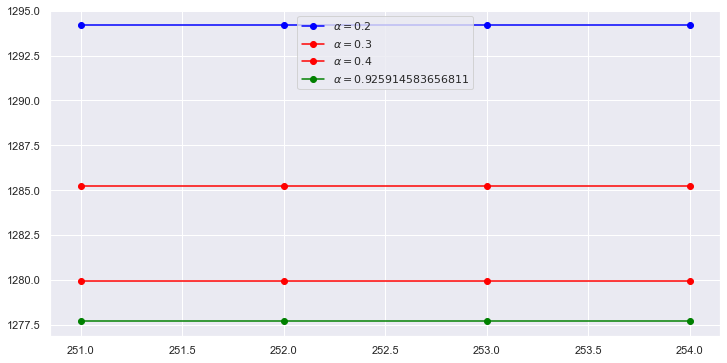

In [48]:
fit1 = SimpleExpSmoothing(Data['OPEN']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(4).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
#fit1.fittedvalues.plot(marker='o',  color='blue')

fit2 = SimpleExpSmoothing(Data['OPEN']).fit(smoothing_level=0.3,optimized=False)
fcast2 = fit2.forecast(4).rename(r'$\alpha=0.3$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
#fit2.fittedvalues.plot(marker='o', color='red')

fit3 = SimpleExpSmoothing(Data['OPEN']).fit(smoothing_level=0.4,optimized=False)
fcast3 = fit3.forecast(4).rename(r'$\alpha=0.4$')
# plot
fcast3.plot(marker='o', color='red', legend=True)
#fit3.fittedvalues.plot(marker='o', color='red')


fit4 = SimpleExpSmoothing(Data['OPEN']).fit()
fcast4 = fit4.forecast(4).rename(r'$\alpha=%s$'%fit4.model.params['smoothing_level'])
# plot
fcast4.plot(marker='o', color='green', legend=True)
#fit4.fittedvalues.plot(marker='o', color='green')

plt.show()



In [49]:
def eval_metric_sexp(x,x1,x2,x3,x4):
      # alpha = 0.2
    residual_1 = (x-x1)
    bias_1  = residual_1.mean()
    abias_1  = abs(residual_1).mean()
    abias_value_1  = abs(residual_1)
    ape_1 = abias_value_1/x
    map_1 = ape_1.mean()*100
    biass_1  = (residual_1)**2
    msr_1 = biass_1.mean()
    biass_1  = (residual_1)**2
    rmsr_1 = np.sqrt(biass_1.mean())
    # alpha = 0.3
    residual_2 = (x-x2)
    bias_2  = residual_2.mean()
    abias_2  = abs(residual_2).mean()
    abias_value_2  = abs(residual_2)
    ape_2 = abias_value_2/x
    map_2 = ape_2.mean()*100
    biass_2  = (residual_2)**2
    msr_2 = biass_2.mean()
    biass_2  = (residual_2)**2
    rmsr_2 = np.sqrt(biass_2.mean())
    #alpha = 0.4
    residual_3 = (x-x3)
    bias_3  = residual_3.mean()
    abias_3  = abs(residual_3).mean()
    abias_value_3  = abs(residual_3)
    ape_3 = abias_value_3/x
    map_3 = ape_3.mean()*100
    biass_3  = (residual_3)**2
    msr_3 = biass_3.mean()
    biass_3  = (residual_3)**2
    rmsr_3 = np.sqrt(biass_3.mean())
    #alpha = 0.422
    residual_4 = (x-x4)
    bias_4  = residual_4.mean()
    abias_4  = abs(residual_4).mean()
    abias_value_4  = abs(residual_4)
    ape_4 = abias_value_4/x
    map_4 = ape_4.mean()*100
    biass_4  = (residual_4)**2
    msr_4 = biass_4.mean()
    biass_4  = (residual_4)**2
    rmsr_4 = np.sqrt(biass_4.mean())
    eva_metric = pd.DataFrame({'alpha = 0.2':[bias_1,abias_1,map_1,msr_1,rmsr_1],
                               'alpha = 0.3':[bias_2,abias_2,map_2,msr_2,rmsr_2],
                               'alpha = 0.4':[bias_3,abias_3,map_3,msr_3,rmsr_3],
                              'alpha = Optimum':[bias_4,abias_4,map_4,msr_4,rmsr_4]}, 
                             index=['Bias','MAE','MAPE','MSE','RMSE'])
    return eva_metric


In [50]:
eval_metric_sexp(Data.OPEN, fit1.fittedvalues, fit2.fittedvalues, fit3.fittedvalues, fit4.fittedvalues)

,alpha = 0.2,alpha = 0.3,alpha = 0.4,alpha = Optimum
Bias,10.203341,6.683267,4.959397,2.136353
MAE,25.710411,20.878116,18.115013,14.624841
MAPE,2.967284,2.415012,2.090202,1.708882
MSE,1281.479468,851.891215,653.741395,412.846123
RMSE,35.797758,29.187176,25.568367,20.318615


In [51]:
forecast = fit1.forecast(4)

In [52]:
forecast

251    1294.207697
252    1294.207697
253    1294.207697
254    1294.207697
dtype: float64

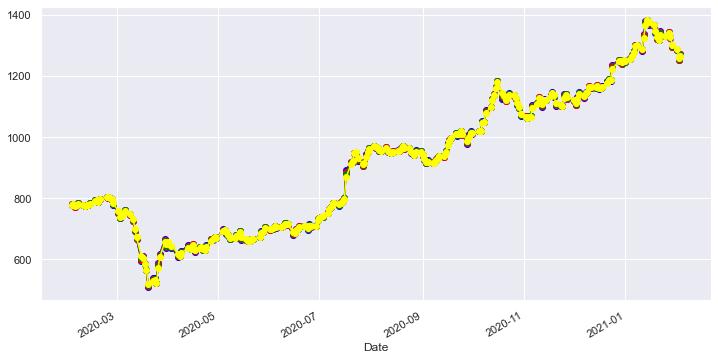

In [53]:

fit1_h = Holt(Data.OPEN, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast1_h = fit1_h.forecast(4).rename("Additive damped trend, l = 0.8")

fit2_h = Holt(Data.OPEN, damped=True).fit(smoothing_level=0.7, smoothing_slope=0.3)
fcast2_h = fit2_h.forecast(4).rename("Additive damped trend, l = 0.7")

fit3_h = Holt(Data.OPEN, damped=True).fit(smoothing_level=0.6, smoothing_slope=0.4)
fcast3_h = fit3_h.forecast(4).rename("Additive damped trend, l = 0.6")

fit4_h = Holt(Data.OPEN,damped=True).fit(smoothing_level=0.5, smoothing_slope=0.5)
fcast4_h = fit4_h.forecast(4).rename("Additive damped trend, l = 0.5")


fit1_h.fittedvalues.plot(marker="o", color='blue')
#fcast1_h.plot(color='blue', marker="o", legend=True)
fit2_h.fittedvalues.plot(marker="o", color='red')
#fcast2_h.plot(color='red', marker="o", legend=True)
fit3_h.fittedvalues.plot(marker="o", color='green')
#fcast3_h.plot(color='green', marker="o", legend=True)
fit4_h.fittedvalues.plot(marker="o", color='yellow')
#fcast4_h.plot(color='yellow', marker="o", legend=True)


In [54]:
def eval_metric_dexp(x,x1,x2,x3,x4):
      # l= 0.8
    residual_1 = (x-x1)
    bias_1  = residual_1.mean()
    abias_1  = abs(residual_1).mean()
    abias_value_1  = abs(residual_1)
    ape_1 = abias_value_1/x
    map_1 = ape_1.mean()*100
    biass_1  = (residual_1)**2
    msr_1 = biass_1.mean()
    biass_1  = (residual_1)**2
    rmsr_1 = np.sqrt(biass_1.mean())
    # l = 0.7
    residual_2 = (x-x2)
    bias_2  = residual_2.mean()
    abias_2  = abs(residual_2).mean()
    abias_value_2  = abs(residual_2)
    ape_2 = abias_value_2/x
    map_2 = ape_2.mean()*100
    biass_2  = (residual_2)**2
    msr_2 = biass_2.mean()
    biass_2  = (residual_2)**2
    rmsr_2 = np.sqrt(biass_2.mean())
    #l= 0.6
    residual_3 = (x-x3)
    bias_3  = residual_3.mean()
    abias_3  = abs(residual_3).mean()
    abias_value_3  = abs(residual_3)
    ape_3 = abias_value_3/x
    map_3 = ape_3.mean()*100
    biass_3  = (residual_3)**2
    msr_3 = biass_3.mean()
    biass_3  = (residual_3)**2
    rmsr_3 = np.sqrt(biass_3.mean())
    #l = 0.5
    residual_4 = (x-x4)
    bias_4  = residual_4.mean()
    abias_4  = abs(residual_4).mean()
    abias_value_4  = abs(residual_4)
    ape_4 = abias_value_4/x
    map_4 = ape_4.mean()*100
    biass_4  = (residual_4)**2
    msr_4 = biass_4.mean()
    biass_4  = (residual_4)**2
    rmsr_4 = np.sqrt(biass_4.mean())
    eva_metric = pd.DataFrame({'l = 0.8':[bias_1,abias_1,map_1,msr_1,rmsr_1],
                               'l = 0.7':[bias_2,abias_2,map_2,msr_2,rmsr_2],
                               'l = 0.6':[bias_3,abias_3,map_3,msr_3,rmsr_3],
                              'l = 0.5':[bias_4,abias_4,map_4,msr_4,rmsr_4]}, 
                             index=['Bias','MAE','MAPE','MSE','RMSE'])
    return eva_metric

In [55]:
eval_metric_dexp(Data.OPEN, fit1_h.fittedvalues,fit2_h.fittedvalues,
                fit3_h.fittedvalues,fit4_h.fittedvalues)

,l = 0.8,l = 0.7,l = 0.6,l = 0.5
Bias,1.674723,1.728652,1.796917,1.897960
MAE,14.625497,14.663702,14.841964,15.180853
MAPE,1.701498,1.702183,1.716674,1.747766
MSE,406.186309,408.866367,418.426641,438.042988
RMSE,20.154064,20.220444,20.455479,20.929477


<Figure size 864x432 with 0 Axes>

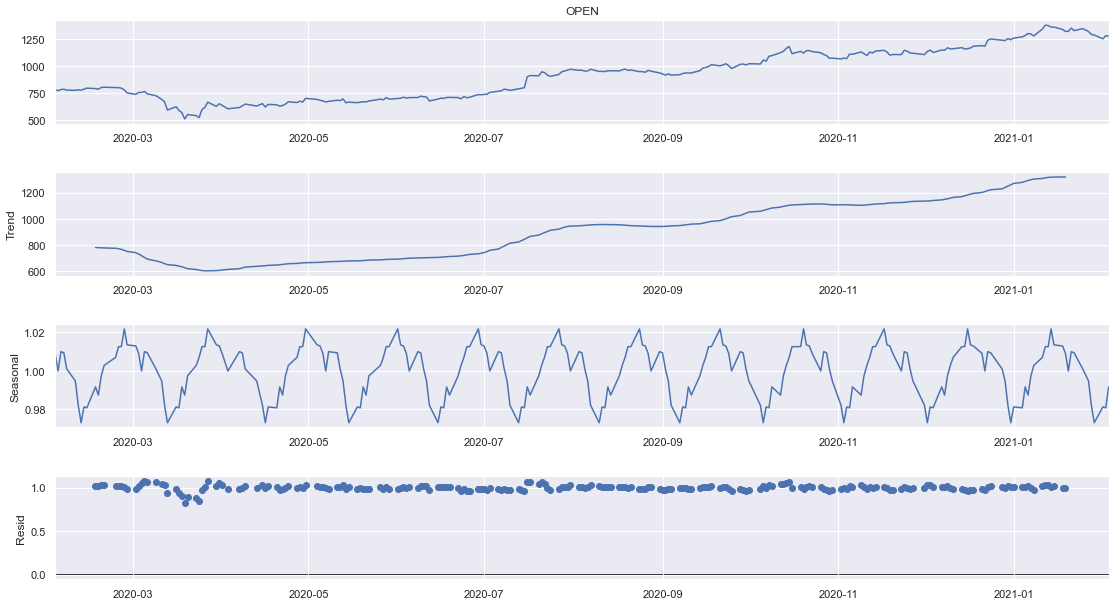

In [56]:
import statsmodels.api as sm
result = seasonal_decompose(Data.OPEN, model='multiplicative',period = 20)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [59]:
a=Data['OPEN']
a

Date
2020-02-03     782.00
2020-02-04     770.10
2020-02-05     781.00
2020-02-06     784.35
2020-02-07     775.95
2020-02-10     774.00
2020-02-11     779.00
2020-02-12     775.80
2020-02-13     785.00
2020-02-14     794.50
2020-02-17     790.30
2020-02-18     785.00
2020-02-19     800.00
2020-02-20     803.25
2020-02-24     800.10
2020-02-25     799.00
2020-02-26     793.95
2020-02-27     778.00
2020-02-28     750.00
2020-03-02     737.00
2020-03-03     755.00
2020-03-04     753.90
2020-03-05     763.75
2020-03-06     741.00
2020-03-09     724.50
2020-03-11     690.65
2020-03-12     668.00
2020-03-13     592.00
2020-03-16     622.00
2020-03-17     588.10
2020-03-18     568.00
2020-03-19     509.25
2020-03-20     549.50
2020-03-23     540.00
2020-03-24     522.00
2020-03-25     597.00
2020-03-26     615.00
2020-03-27     665.05
2020-03-30     625.10
2020-03-31     650.00
2020-04-01     634.35
2020-04-03     603.50
2020-04-07     615.00
2020-04-08     630.00
2020-04-09     646.80
2020-

In [60]:
Data.columns

Index(['OPEN', 'fnaive', 'MA_2', 'MA_3', 'MA_4'], dtype='object')

In [62]:
#Data=Data.drop('final',axis=1)

In [63]:
Data

,OPEN,fnaive,MA_2,MA_3,MA_4
Date,,,,,
2020-02-03,782.00,NaN,NaN,NaN,NaN
2020-02-04,770.10,782.00,NaN,NaN,NaN
2020-02-05,781.00,770.10,776.05,NaN,NaN
2020-02-06,784.35,781.00,775.55,777.70,NaN
2020-02-07,775.95,784.35,782.68,778.48,779.36
2020-02-10,774.00,775.95,780.15,780.43,777.85
2020-02-11,779.00,774.00,774.98,778.10,778.82
2020-02-12,775.80,779.00,776.50,776.32,778.32
2020-02-13,785.00,775.80,777.40,776.27,776.19


In [69]:
x=(Data['OPEN']-Data['fnaive']).dropna().values
log_x=(np.log(Data.OPEN)-np.log(Data.fnaive)).dropna().values

In [70]:
adfuller(x)

(-5.006913639091186,
 2.1504461833527685e-05,
 6,
 243,
 {'1%': -3.4575505077947746,
  '5%': -2.8735087323013526,
  '10%': -2.573148434859185},
 2077.088195240079)

In [613]:
from statsmodels.tsa.stattools import adfuller
X = a.diff(1).dropna()
result = adfuller(X)
print('ADF Statistic: %.3f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, abs(value)))

ADF Statistic: -5.007
p-value: 0.000022
Critical Values:
	1%: 3.458
	5%: 2.874
	10%: 2.573


In [624]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
X1 = (np.log(Data.OPEN) - np.log(Data.OPEN).shift(1)).dropna().values
X11 = (np.log(Data.OPEN) - np.log(Data.OPEN).shift(1)).values
X2 = (Data.OPEN -Data.OPEN.shift(1)).dropna().values
result = adfuller(X1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

result = adfuller(X2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.210312
p-value: 0.000008
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
ADF Statistic: -5.006914
p-value: 0.000022
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


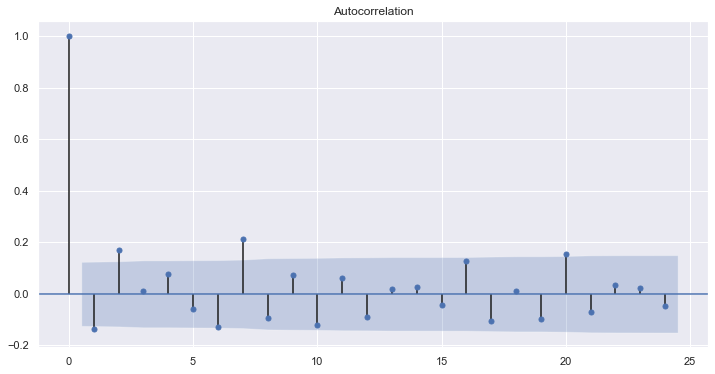

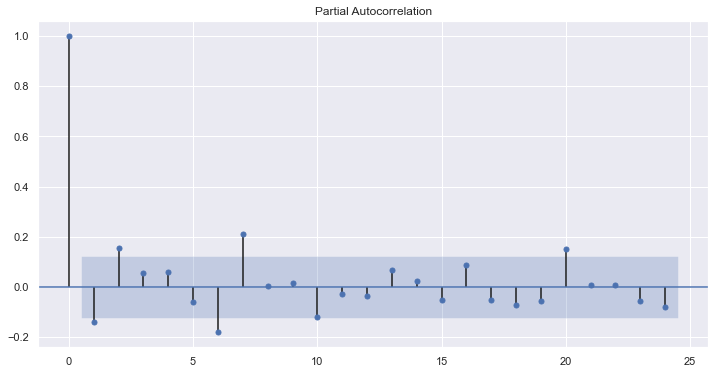

In [74]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(log_x)
plot_pacf(log_x)
pyplot.show()

In [78]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(a,(2,1,2)).fit()

print(model.summary())

ax[1].plot(model.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(model.resid.values)));
ax[1].hlines(0, xmin=0, xmax=350, color='r');
ax[1].set_title("ARIMA(2,1,1)");
ax[1].legend();

                             ARIMA Model Results                              
Dep. Variable:                 D.OPEN   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1102.324
Method:                       css-mle   S.D. of innovations             19.881
Date:                Fri, 19 Feb 2021   AIC                           2216.647
Time:                        16:45:59   BIC                           2237.776
Sample:                             1   HQIC                          2225.151
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0037      1.271      1.576      0.115      -0.488       4.496
ar.L1.D.OPEN     0.2233      0.129      1.734      0.083      -0.029       0.476
ar.L2.D.OPEN    -0.7460      0.107     -6.94

# Final result

In [81]:
Forecast=model.forecast(10)
Forecast

(array([1283.51493383, 1287.05942325, 1286.526739  , 1286.81454292,
        1290.32726431, 1293.94815219, 1295.18733581, 1295.81388275,
        1298.0804065 , 1301.17025214]),
 array([19.8810248 , 26.78259984, 33.30368839, 39.72295938, 44.78674269,
        48.68401787, 52.42489639, 56.37216604, 60.06560551, 63.24174489]),
 array([[1244.54884125, 1322.4810264 ],
        [1234.56649215, 1339.55235435],
        [1221.25270921, 1351.80076879],
        [1208.95897317, 1364.67011267],
        [1202.54686165, 1378.10766697],
        [1198.52923053, 1389.36707385],
        [1192.436427  , 1397.93824462],
        [1185.32646757, 1406.30129792],
        [1180.353983  , 1415.80683   ],
        [1177.21870983, 1425.12179444]]))

In [631]:
a=model_fit_212.forecast(2)[2]

In [632]:
a

array([[7.10829215, 7.20550922],
       [7.09737604, 7.22574495]])

In [149]:
import numpy as np

In [139]:
Data

,Close,fnaive,MA_2,MA_3,MA_4
Date,,,,,
2020-12-01,1137.85,NaN,NaN,NaN,NaN
2020-12-02,1140.90,1137.85,NaN,NaN,NaN
2020-12-03,1126.45,1140.90,1139.38,NaN,NaN
2020-12-04,1134.65,1126.45,1133.68,1135.07,NaN
2020-12-07,1143.50,1134.65,1130.55,1134.00,1134.96
2020-12-08,1153.35,1143.50,1139.08,1134.87,1136.38
2020-12-09,1175.20,1153.35,1148.42,1143.83,1139.49
2020-12-10,1167.75,1175.20,1164.28,1157.35,1151.68
2020-12-11,1163.20,1167.75,1171.47,1165.43,1159.95


In [68]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Unnamed: 14
0,2020-12-01,EQ,1105.05,1140.25,1105.05,1100.00,1137.05,1137.85,1129.13,1186.00,509.25,8933802.0,1.008746e+10,227850.0,NaN
1,2020-12-02,EQ,1134.00,1147.45,1121.00,1137.85,1142.00,1140.90,1130.35,1186.00,509.25,6741637.0,7.620427e+09,153925.0,NaN
2,2020-12-03,EQ,1147.00,1147.00,1122.70,1140.90,1125.00,1126.45,1128.63,1186.00,509.25,16212632.0,1.829802e+10,247732.0,NaN
3,2020-12-04,EQ,1125.00,1137.00,1115.00,1126.45,1134.50,1134.65,1127.86,1186.00,509.25,10564055.0,1.191473e+10,167778.0,NaN
4,2020-12-07,EQ,1147.30,1153.00,1136.00,1134.65,1142.95,1143.50,1142.07,1186.00,509.25,7792141.0,8.899187e+09,168273.0,NaN
5,2020-12-08,EQ,1145.00,1167.00,1145.00,1143.50,1153.00,1153.35,1154.21,1186.00,509.25,12308330.0,1.420639e+10,272695.0,NaN
6,2020-12-09,EQ,1168.05,1179.50,1157.00,1153.35,1176.55,1175.20,1169.97,1186.00,509.25,10039346.0,1.174577e+10,274494.0,NaN
7,2020-12-10,EQ,1157.40,1171.65,1150.00,1175.20,1168.00,1167.75,1164.18,1186.00,509.25,9488782.0,1.104664e+10,295020.0,NaN
8,2020-12-11,EQ,1159.70,1171.95,1155.25,1167.75,1165.20,1163.20,1163.84,1186.00,509.25,10574009.0,1.230650e+10,178023.0,NaN
9,2020-12-14,EQ,1169.40,1172.60,1148.20,1163.20,1163.50,1164.55,1159.72,1186.00,509.25,6728187.0,7.802806e+09,186990.0,NaN


In [72]:
df.columns

Index(['Date', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades ', 'Unnamed: 14'],
      dtype='object')

In [647]:
a = Data['OPEN']

In [648]:
adfuller(a.diff(1).dropna())

(-5.006913639091186,
 2.1504461833527685e-05,
 6,
 243,
 {'1%': -3.4575505077947746,
  '5%': -2.8735087323013526,
  '10%': -2.573148434859185},
 2077.088195240079)

p,d,q = (,1,)

In [649]:
model=ARIMA(a,(2,1,2)).fit()

In [650]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.OPEN   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1102.324
Method:                       css-mle   S.D. of innovations             19.881
Date:                Wed, 03 Feb 2021   AIC                           2216.647
Time:                        22:50:28   BIC                           2237.776
Sample:                             1   HQIC                          2225.151
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0037      1.271      1.576      0.115      -0.488       4.496
ar.L1.D.OPEN     0.2233      0.129      1.734      0.083      -0.029       0.476
ar.L2.D.OPEN    -0.7460      0.107     -6.948      0.000      -0.956      -0.536
ma.L1.D.OPEN    -0.3207      0.102     -3.142      0.002      -0.521      -0.121
ma.L2.D.OPEN     0.8608      0.082     10.465      0.000       0.700       1.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1497           -1.1481j            1.1578           -0.2294
AR.2            0.1497           +1.1481j            1.1578            0.2294
MA.1            0.1863           -1.0616j            1.0779           -0.2224
MA.2            0.1863           +1.0616j            1.0779            0.2224
-----------------------------------------------------------------------------
"""

In [653]:
Data

,OPEN,fnaive,MA_2,MA_3,MA_4,Snaive,tnaive
Date,,,,,,,
2020-02-03,782.00,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,770.10,782.00,NaN,NaN,NaN,NaN,NaN
2020-02-05,781.00,770.10,776.05,NaN,NaN,782.00,NaN
2020-02-06,784.35,781.00,775.55,777.70,NaN,770.10,782.00
2020-02-07,775.95,784.35,782.68,778.48,779.36,781.00,770.10
2020-02-10,774.00,775.95,780.15,780.43,777.85,784.35,781.00
2020-02-11,779.00,774.00,774.98,778.10,778.82,775.95,784.35
2020-02-12,775.80,779.00,776.50,776.32,778.32,774.00,775.95
2020-02-13,785.00,775.80,777.40,776.27,776.19,779.00,774.00


In [651]:
model.forecast(2)

(array([1283.51493383, 1289.62903932]),
 array([19.8810248 , 26.78259984]),
 array([[1244.54884125, 1322.4810264 ],
        [1237.13610823, 1342.12197042]]))

In [655]:
Forecast=model.forecast(5)

In [673]:
a=pd.Series(Forecast)

In [674]:
a

0    [1283.5149338253627, 1287.059423248002, 1286.5...
1    [19.88102479501237, 26.782599839126426, 33.303...
2    [[1244.5488412513907, 1322.4810263993347], [12...
dtype: object

In [675]:
a[0]

array([1283.51493383, 1287.05942325, 1286.526739  , 1286.81454292,
       1290.32726431])

In [679]:
b=pd.DataFrame(a[0],columns=['predicted'])

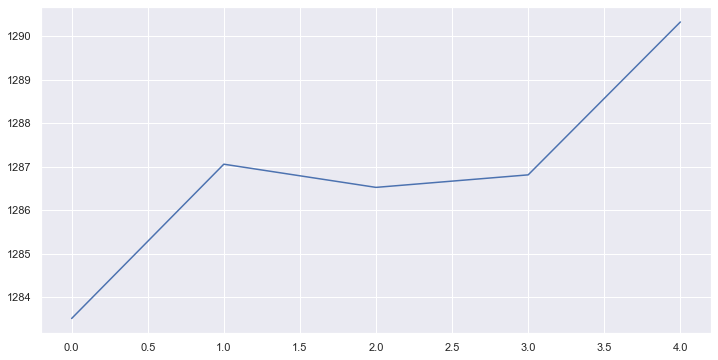

In [682]:
plt.plot(b)